In [9]:
#bibliotecas necessárias para resolução de exercícios
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## Exemplo 1

De formar geral, $\Delta$H para qualquer processo pode ser calculado via $dH = C_p dT + \left ( \frac{\partial H}{\partial p} \right)_p dp$. Calcule $\Delta$H para expansão de 1.00 mol de $O_2(g)$ de 25ºC, 5.00 L e 4.93 bar, para 125ºC, 6.75L e 4.90 bar. Considere comportamento de gás ideal. Dado: $C_{p,m} = 29.355 J K^{-1} mol^{-1}$.


## Solução

Para um gás ideal $\left ( \frac{\partial H}{\partial p} \right)_p = 0 $. Logo, o problema se resume a integrar a capacidade calorífica. $ \Delta H = n \times C_p \Delta T $.

In [2]:
# Inicialização das variáveis

n = 1.0            # mol 
Cp = 29.355        # J/ K mol
Ti = 25.0          # ºC
Tf = 125.0         # ºC

#Cálculo
DH = n * Cp * (Tf - Ti) 

print('Delta H (J/mol)= ' + format(DH , '6.3f'))

Delta H (J/mol)= 2935.500


## Exemplo 2

Repita o cálculo anterior, assumindo que o $O_2(g)$ é um gas de van der Waals. Nestes casos, $\left ( \frac{\partial H}{\partial p} \right)_p = n \left ( b - \frac{2a}{RT} \right) $.

Neste caso, a integral a equação a ser resolvida é: 
$$ \Delta H = n \times \int_{298 K}^{398 K} C_p dT  + n \times \int_{4.93 }^{4.90} \left ( b - \frac{2a}{RT} \right ) dp  $$


No entanto a integração não pode ser resolvida diretamente porque a pressão é função da temperatura e vice-versa. Logo, a integral acima é uma integral de linha. Como $\Delta$H é uma função de estado termodinâmico, vamos separar o problema em dois:

1) Considerar uma transformação a p = cte de 25ºC até 125ºC;

2) Depois do sistema ser aquecido, vamos considerar uma transformação a T = cte de 4.93 bar até 4.90 bar.

In [3]:
# Inicialização das variáveis

n = 1.0            # mol 
Cp = 29.355        # J/ K mol
Ti = 25.0          # ºC
Tf = 125.0         # ºC
pi = 4.93          # bar
pf = 4.90          # bar
a = 0.1380         # m^3 Pa / mol^2
b = 0.0319e-3      # m^3 / mol 
R = 8.314          # J/ K mol  


#Transformação 1
DH1 = n * Cp * (Tf - Ti) 

#Transformação 2
DH2 = n * (b - 2*a/(R*(Tf+273)))*(pf-pi)*1e5

DH = DH1 + DH2

print('Delta H (J/mol)= ' + format(DH , '6.3f'))

Delta H (J/mol)= 2935.655


## Exemplo 3

É comum fazer a seguinte a proximação: $\left ( \frac{\partial H}{\partial p} \right)_p = -C_p \mu$. Considerando $ \mu(O_2 ) = 0.25  K  bar^{-1}$. Repita os cálculos do problema anterior.

## Solução

Por questões de formalismo, o procedimento adotado será o mesmo adotado do segundo exemplo:

1) Considerar uma transformação a p = cte de 25ºC até 125ºC;

2) Depois do sistema ser aquecido, vamos considerar uma transformação a T = cte de 4.93 bar até 4.90 bar.

In [4]:
# Como todas as variáveis já foram definidas, só repetiremos o cálcul de DH2

mu = 0.25    # K/bar

#Transformação 2
DH2 = -n * Cp * mu*(pf-pi)

#Variação da entalpia total

DH = DH1 + DH2

print('Delta H (J/mol)= ' + format(DH , '6.3f'))

Delta H (J/mol)= 2935.720


## Exemplo 4

Considere a compressão de 1.0 mol de um gás ideal, de 22.4 L para 10.0L mantendo T constante a 0ºC. Calcule o trabalho realizado neste processo. Repita os cáclulos para uma segunda compressão de 10.0 L até 1.0 L mantendo a temperatura a 0ºC. 

## Solução 

Em primeiro lugar é preciso encontrar um expressão para o trabalho p-V de um gás ideal. 
$$ dW = -pdV $$
$$ p = nRT/V $$
$$ \int dW = -nRT \int \frac{dV}{V} $$
$$ W = -nRT ln(V_2/V_1) $$

In [5]:
#Primeira compressão

R = 8.314          # J/K mol
n = 1.0            # mol
T = 273.15         # K
V1 = 22.4          # L
V2 = 10.0            

# Cálculo

W1 = -n*R*T*np.log(V2/V1)

print('W (J)= ' + format(W1 , '6.3f'))

W (J)= 1831.482


In [6]:
# Segunda Compressão

V3 = 1.0       # L

# Cálculo

W2 = -n*R*T*np.log(V3/V2)

print('W (J)= ' + format(W2 , '6.3f'))

W (J)= 5229.100


O trabalho total é a soma dos trabalhos realizados em cada etapa. Neste ponto é ilustrativo comparar o trabalho total realizado em duas etapas, com o trabalho realizado em uma única etapa de 22.4 L até 1 L.

In [7]:
# Trabalho total em 2 etapas

Wtotal = W1 + W2

print('W em duas etapas(J)= ' + format(Wtotal , '6.3f'))

# Trabalho total em uma etapa

W = -n*R*T*np.log(V3/V1)

print('W em uma única etapa (J)= ' + format(W , '6.3f'))


W em duas etapas(J)= 7060.581
W em uma única etapa (J)= 7060.581


## Exemplo 5

Repita o exercício anterior para o $O_2$, assumindo que este se comporta como um gás de van der Waals. 

## Solução

Novamente nosso problema se resume a encotrar uma equação com a qual podemos calcular o trabalho feito por um gás de van der Waals.
$$ dW = -pdV $$
$$ p = \frac{RT}{V_m-b} - \frac{a}{V^2_m} $$
$$ \int dW = - \int \left (\frac{RT}{V_m-b} - \frac{a}{V^2_m} \right)dV $$
$$ W = -RT ln \left( \frac{V_{m,2} -b}{V_{m,1} -b} \right) -a \left( \frac{1}{V_{m,2}} - \frac{1}{V_{m,1}} \right) $$

In [12]:
#Primeira compressão

R = 8.314          # J/K mol
n = 1.0            # mol
T = 273.15         # K
V1 = 22.4e-3        # m^3
V2 = 10.0e-3            
a = 0.1380         # m^3 Pa / mol^2
b = 0.0319e-3      # m^3 / mol 

#Cálculo

W1 = -R*T*np.log((V2-b)/(V1-b)) -a*(1/V2 - 1/V1)

print('W (J)= ' + format(W1 , '6.3f'))

W (J)= 1827.862


In [13]:
# Segunda Compressão

V3 = 1.0e-3    # L

W2 = -R*T*np.log((V3-b)/(V2-b)) -a*(1/V3 - 1/V2)

print('W (J)= ' + format(W2 , '6.3f'))

W (J)= 5171.268


Agora será calculado o trabalho total realizado na compressão em dois estágios. Para fins de comparação, o trabalho total será calculado em uma compressão em um estágio, considerando os mesmos estados finais e iniciais.

In [14]:
# Trabalho total em 2 etapas

Wtotal = W1 + W2

print('W em duas etapas(J)= ' + format(Wtotal , '6.3f'))

# Trabalho total em uma etapa

W = -R*T*np.log((V3-b)/(V1-b)) -a*(1/V3 - 1/V1)

print('W em uma única etapa (J)= ' + format(W , '6.3f'))

W em duas etapas(J)= 6999.130
W em uma única etapa (J)= 6999.130


## Exemplo 6

A equação de estado dos gases pode ser escrita na forma de uma expansão do virial, $ pV_m = RT \left( 1 + \frac{B}{V_{m,}} + \frac{C}{V^2_{m}} + ...\right)$. Repita os exercícios anteriores para compressão do $O_2$ e compare os resultados. 

In [ ]:
# Resolução

## Exemplo 7

O estado de um gás pode ser descrito pela equação de Redlich-Kwong, $ \left (p +\frac{a}{V_m(V_m +b)T^{1/2}} \right) (V_m - b) = RT $. Repita os exercícios anteriores para compressão do $O_2$ e compare os resultados. Dados: a = 17.16 $L² K^{1/2} atm. mol^{-2}$, b = 0.0221 L/mol.

In [ ]:
# Resolução

### Este notebook apresenta uma maneira de reolver os exercícios propostos pelo livro Físico-Química, v. 1/10 ed., Atkins, Peter W.

##Exemplo 2B.1) 
A variação de energia interna molar quando $CaCO_3$, na forma de calcita, se converte em aragonita é de +0,21kJ/mol. Calcule a diferença entre a variação da entalpia molar e a variação de energia interna molar quando a pressão é de 1,0 bar, sabendo que as massas dos polimorfos são 2,71 g/cm³ e 2,93 g/cm³, respectivamente.

In [16]:
#Definindo variáveis

DeltaUcalcilta  = 0.21    #KJmol^-1
p = 1e5                   #Pa (Valor convertido de bar para Pa)
Mmolar = 100.9            #g/mol
rhoa = 2.93               #g/cm³ (densidade aragonita)
rhoc = 2.71               #g/cm³ (densidade calcita)

#Usando as equações, temos:
#DeltaHm = U + pV

#DeltaHm = Hm(aragonita) - Hm(calcita)
#DeltaHm = {Um(a)+ pVm(a) - Um(c) + pVm(c)}
#DeltaHm = DeltaUm + p{Vm(a) - Vm(c)}

#Variação= Delta Hm-Delta Um

Variação = p*Mmolar*((1/rhoa) - (1/rhoc))

print("Variação entre a Entalpia e Energia Interna (Pa*cm³ mol-¹)=" + format(Variação,'6.2e'))

#Convertendo os de cm³ para m³, temos:

var = Variação/1000000

print('Variação entre a Entalpia e Energia Interna (J mol-¹)=' + format(var,'6.2f'))





Variação entre a Entalpia e Energia Interna (Pa*cm³ mol-¹)=-2.80e+05
Variação entre a Entalpia e Energia Interna (J mol-¹)= -0.28


## Exemplo 2.B2) 

Qual a variação da entalpia molar do $N_2$ quando ele é aquecido de 25°C até 100°C? Considere $C_{p,m} (J K^{-1} mol^{-1}) = 28,58 + 3,77 \times 10^{-3} T - \frac{0,50 \times 10^5}{T^2}$.

### Solução

Este problema é solucionado resolvendo a seguinte equação:

$$\Delta Hº_m = \int_{298 K}^{373 K} C_{p,m}dT $$

$$\Delta Hº_m = \int_{298 K}^{373 K} (28,58 + 3,77 \times 10^{-3} T - \frac{0,50 \times 10^5}{T^2} )dT $$

In [17]:
#Definindo variáveis (Como a capacidade calorífica do N2 se altera com a temperatura, logo, usaremos a equação 1)

T1 = 298        #K
T2 = 373        #K
a = 28.58   
b = 3.771e-3    #K-1
c= -0.50e5      #K²

# a, b e c são valores tabelados e de acordo com cada composto estudado

# Escrevendo o resultado analítico da integral:


DeltaH = (a*(T2-T1)) + (1/2*b*(T2**2-T1**2)) - c*((1/T2)-(1/T1))

print(" Diferença de entalpia (J K-¹ mol-¹) =" + format(DeltaH,'6.4e'))

 Diferença de entalpia (J K-¹ mol-¹) =2.2047e+03


### Exemplo 2.C2)

A entalpia-padrão de formação do $H_2 O(g)$ a 298K  é -241,82 kJ/mol. Estime seu valor a 100°C dadas as seguintes capacidades caloríficas molares, a pressão constante: $H_2 O(g):33,58 ~J K^{-1} mol^{-1}; H_2 (g): 28,84 ~J K^{-1} mol^{-1}; O_2(g): 29,37 ~J K^{-1} mol^{-1}$. Admita que as capacidades caloríficas sejam independentes da temperatura.

### Solução

É possível estimar a variação de entalpia em uma determinada temperatura a partir da entalpia e capacidades caloríficas em uma temperatura de referência. Nestes casos, é aplicada a Lei de Kirchhoff:

$$ \int d\Delta H = \int_{T_1}^{T_2} \Delta C_{p} dT$$

$$ \Delta H(T_2) -  \Delta H(T_1) = \int_{T_1}^{T_2} \Delta C_{p} dT$$

Onde $\Delta C_{p}$ é a diferença das capacidades caloríficas entre produtos e reagentes.

In [1]:
#Definindo variáveis
T1 = 298          #K
T2 = 373          #K
cpH20 = 33.58     # J K-¹ mol-¹
cpH2 = 28.84      # J K-¹ mol-¹
cpO2 = 29.37      # J K-¹ mol-¹
HH20 = -241820    # J/mol

#Cálculos

#Reação:  H2(g) + 1/2* O2(g) ----> H2O (g)

DeltaCp = cpH20 - (cpH2 + (1/2*cpO2))

DeltaH2 = HH20 + DeltaCp*(T2-T1)

print("Entalpia-padrão de formação a 373K (J)=" + format(DeltaH2,'6.2f'))


Entalpia-padrão de formação a 373K (J)=-242565.88


### Exercício 2A.3a)

Uma reação química ocorre num vaso de seção reta uniforme de 50 cm², provido de um pistão. Em virtude de reação, o pistão se desloca 15 cm contra a pressão externa de 1 atm. Calcule o trabalho feito pelo sistema.

### Solução 

O trabalho é $ W = -\int p_{ext} dV = - p_{ext} \Delta V $, onde a variação do volume é dado pela distância de deslocamento do pistão multiplicado pela área seção reta do mesmo.

In [2]:
# Definindo variáveis

A= 0.0050     #m² (Valor já convertido de cm² para m²) 
x = 0.15      #m (Valor já convertido de cm para m)
P = 101325    #Pa (Valor convertido de 1 atm para Pascal)

#Cálculos (Como o pistão se desloca contra a pressão externa, o valor do trabalho será negativo)

Volume = A*x

W= - P*Volume

print("Trabalho (J)=" + format(W,'6.3f'))

Trabalho (J)=-75.994


### Exercício 2A.5(a) 

Uma amostra de 1,00 mol de um gás perfeito monoatômico, Cv = 3/2R, inicialmente a $p_1$ = 1,00 atm e $T_1$ = 300 K, é aquecida reversivelmente, até 400 K, a volume constante. Calcule a pressão final, ΔU, q e w.

### Solução

Para este caso, W = 0, pois V = cte, e dU = dQ. Logo:

$$ \Delta U = Q = \int_{T_1}^{T_2} C_V dT $$

In [3]:
#Definindo variáveis

p = 1   #atm

T1 = 300    #K
T2 = 400    #K
R=8.3145    #J K-¹ mol-¹
Cv= 3/2*R
n = 1       #mol

# Primeiro passo - Integração: dU = ∫ Cv*dT

ΔU = Cv*(T2-T1)       #Após a integração.

print('ΔU (J) =' + format(ΔU,'6.4f'))

Q = ΔU

print('q (J) =' + format(Q,'6.4f'))


ΔU (J) =1247.1750
q (J) =1247.1750


### Exercício 2B.2(a) 

A capacidade calorífica a pressão constante de uma amostra de gás perfeito varia com a temperatura de acordo com a expressão $C_p (J K^{-1}) = 20,17 + 0,3655 (T/K)$. Calcule q, w e ΔH, quando a temperatura é elevada de 25°C a 200°C (i) a pressão constante e (ii) a volume constante.

### Solução do problema a p = cte

Sabe-se que nessas condições de pressão constante q = $ \Delta H $. Portanto, temos realizar apenas uma integração:

$$ \Delta H = q= \int_{T_1}^{T_2} C_p dT$$ 

$$ \Delta H = q =  \int_{298 K}^{473 K} 20,17 + 0,3665(T/K)   dT  $$

O trabalho é calculado a partir da primeira Lei da Termodinâmica: $ \Delta U = Q + W $.
Como é um gás ideal, $ C_p - C_V = nR $, precisaremos integrar a seguinte equação, assumindo 1 mol de gás ideal:

$$ \Delta U =  \int_{298 K}^{473 K} (20,17 + 0,3665(T/K) -R)   dT  $$

### Solução do problema a V = cte

A volume constante W = 0, logo, o cálculo da entalpia se dará pela seguinte integração :

$$ \Delta H = \int_{T_1}^{T_2} C_p dT$$ 

$$ \Delta H =  \int_{298 K}^{473 K} 20,17 + 0,3665(T/K)   dT  $$

O calor será calculado a partir da primeira Lei da Termodinâmica: $ \Delta U = Q  $.
Como é um gás ideal, $ C_p - C_V = nR $, precisaremos integrar a seguinte equação, assumindo 1 mol de gás ideal:

$$ \Delta U =  \int_{298 K}^{473 K} (20,17 + 0,3665(T/K) -R)   dT  $$

In [5]:
#Definindo variáveis

T2 = 473    #K  
T1 = 298    #K  
n = 1       #mol
R = 8.3145  #J-¹mol-¹

# (i) = Pressão Constante
# cálculo do calor
q = (20.17 * (T2 - T1)) + ((0.5*0.3665)*(T2**2-T1**2))

print("a) q (J) =" + format(q,'6.4f'))

#Como temos a pressão constante, sabe-se que q = ΔH. Portanto:

ΔH = q
print ("a) ΔH (J)=" + format(ΔH,'6.4f'))


# Calculando trabalho: 

DeltaU = (20.17-R * (T2 - T1)) + (0.5*0.3665)*(T2**2-T1**2)

W = DeltaU - q

print("a) W (J) = " + format(W,'6.4f'))


#(ii) Volume Constante

#cálculo da entalpia

ΔH = 20.17 * (T2 - T1) + (0.5*0.3665)*(T2**2-T1**2)

print("b) ΔH (J)=" + format(ΔH,'6.4f'))


# O trabalho depende da variação de volume, portanto:

W1 = 0

print ("b) W (J) = " + format(W1,'6.4f'))

#Calculando o calor.
#Primeiro é obtido a variação da energia interna

DeltaU = (20.17-R * (T2 - T1)) + (0.5*0.3665)*(T2**2-T1**2)

q = DeltaU

print ("b) q (J) = " + format(q,'6.4f'))


a) q (J) =28254.7562
a) ΔH (J)=28254.7562
a) W (J) = -4964.6175
b) ΔH (J)=28254.7562
b) W (J) = 0.0000
b) q (J) = 23290.1387


### Exercício 2B.3(b)

Quando se aquecem 2 mols de $CO_2$, à pressão constante de 1,25 atm, sua temperatura passa de 250 K a 277 K. A capacidade calorífica molar de $CO_2$, a pressão constante, é 37,11 JK-¹ mol-¹. Calcule q, ΔH e ΔU.

### Solução 

Sabe-se que nessas condições de pressão constante q = $ \Delta H $. Portanto, temos realizar apenas uma integração:

$$ \Delta H = q= \int_{250}^{277} C_p dT$$ 


Como é um gás ideal, $ C_p - C_V = nR $, precisaremos integrar a seguinte equação

$$ \Delta U =  \int_{250}^{277} (C_p - 2R) dT   dT  $$

In [6]:
#Definindo variáveis

p = 1.25    #atm
T1 = 250    #K
T2 = 270    #K
cp = 37.11  #J K-¹ mol-¹ 
n = 2       #mol
R = 8.314   # J K-¹ mol-¹



ΔH = n * cp * (T2-T1)

print("ΔH (J) =" + format(ΔH,'6.2f'))

q = ΔH 

print("q (J) =" + format(q,'6.2f'))

# Como temos somente o Cp, podemos achar o cv através de: R = Cp - Cv

Cv = cp - n*R

ΔU = n * Cv * (T2 - T1)

print("ΔU (J) =" + format(ΔU,'6.4f'))


ΔH (J) =1484.40
q (J) =1484.40
ΔU (J) =819.2800


### Exercícios 2C.2(a)

A entalpia-padrão de formação do etilbenzeno é -12,5 kJ/mol. Calcule a entalpia-padrão de combustão do etilbenzeno.

### Solução

Para este exercício será necessário escrever a equação química para combustão completa do etilbenzeno e usar as tabelas de dados termodinâmicos discponíveis nos livros.

Reação:
$$ C_8 H_{18(l)} + \frac{21}{2} O_{2(g)} \rightarrow 8CO_{2(g)} + 5H_2 O_{(l)} $$


$$ \Delta_{com} H^0 = 8 \Delta_{f} H^0(CO_{2(g)}) + 5 \Delta_{f} H^0(H_2 O_{(l)}) - \Delta_{f} H^0(C_8 H_{18(l)})$$  

In [7]:
# Definindo variáveis

H_H2O = -286   #kJ (Entalpia-padrão de formação da água - retirada de valor tabelado)
H_CO2 =  -393  #kJ (Entalpia-padrão de formação do dióxido de carbono - retirada de valor tabelado)
H_etilbenzeno = -12.5   #kJ

# Cálculo da entalpia de combustão
# Sabe-se que a entalpia do O2 é nula, já que é uma substância simples na forma alotrópica. Portanto, usamos apenas a entalpia do etilbenzeno para os cálculos.

DeltaH_c = 8*H_CO2 + 5*H_H2O - H_etilbenzeno

print("Entalpia de combustão (kJ/mol) =" + format(DeltaH_c,'6.1f'))



Entalpia de combustão (kJ/mol) =-4561.5


## Exercício 2C3(b)

A partir dos dados que são apresentados a seguir, determine a $ \Delta_f H^0$ do diborano, $B_2H_{6(g)}$, a 298 K.

$$(1)~~ B_2H_{6(g)} + 3 O_{2(g)} \rightarrow B_2O_{3(s)} + 3 H_2O_{(g)} ~~   \Delta H = -1941 kJ/mol$$


$$(2)~~  2 B_{(s)} + 3/2 O_{2(g)} \rightarrow B_2O_{3(s)} ~~  \Delta H = -2368 kJ/mol$$


$$(3) ~~ H_{2(g)} + 1/2 O_{2(g)} \rightarrow H_2 O_{(g)}   ~~  \Delta H = -241,8 kJ/mol $$




In [ ]:
# Definindo variáveis

DH1 = -1941    #kJ/mol
DH2 = -2368    #kJ/mol
DH3 = -241.8   #kJ/mol

# Definindo as reações

# 1) Multiplicar a reação (3) por 3, a fim de igualar a equação (2) em relação ao O2.

# 3H₂(g) + 3/2 O₂(g) → 3H₂O(g) 

DH3 = DH3*3

# (2) 2 B(s) + 3/2 O₂(g) → B₂O₃(s) ΔH = -2368 kJ/mol

# Inverter a reação (1):

# (1) B₂O₃(s) + 3 H₂O(g) → B₂H₆(g) + 3 O₂(g)             HΔ = 1941 kJ/mol

DH1invertido =  1941 #kJ/mol

# O próximo passado é cortar as reações.

#3H₂(g) + 3/2 O₂(g) → 3H₂O(g)
#2 B(s) + 3/2 O₂(g) → B₂O₃(s)
#B₂O₃(s) + 3 H₂O(g) → B₂H₆(g) + 3 O₂(g)
#-------------------------------------------

# 2B + 3 H₂ → B₂H₆    

DHdiborano = DH3 + DH2 + DH1invertido

print("Entalpia-padrão de formação do B₂H₆ (kJ/mol)=" + format(DHdiborano,'6.4f'))


## Problemas 2C.1) 

Uma amostra de 0,727 g do áçucar D-ribose ($C_5H_{10}O_5$) foi posta numa bomba calorimétrica e queimada na presença de oxigênio, em excesso. A temperatura se elevou de 0,910 K. Numa outra experiência, no mesmo calorímetro, a combustão foi de 0,825 g de ácido benzóico, cuja energia interna de combustão é -3251 kJ/mol, provocou uma elevação de temperatura de 1,940 K. Calcule a entalpia de formação da D-ribose. 

In [ ]:
#Definindo variáveis

m2 = 0.727      #g
m1 = 0.825      #g
T2 = 0.910      #K
T1 = 1.940      #K
qv = -3251      #kJ/mol
MM1 = 122.12    #K
MM2 = 150.13    #K

#Cálculos :  Iniciamos com os valores do ácido benzóico, já que temos o valor da energia interna.

n1 = m1 / MM1

# Delta U = q * n

DU = qv * n1


#Cálculo para encontrar a  capacidade calorífica que posteriormente será usado para encontrarmos o ΔU da D-ribose.

C = DU / T1


#Para D-ribose:

DU_rib = C* T2

print ('energia interna de combustão da amostra de D-Ribose(kJ) =' + format(DU_rib,'6.4f'))

n2 = m2 / MM2

DUr = DU_rib / n2
print("A energia interna de combustão da D-Ribose (kJ/mol) =" + format(DUr,'6.4f'))

#Combustão da D-ribose:  C5H10O5 +   5O₂    --->  5CO₂  +   5H₂O

# Como é um sólido, vamos assumir que DeltaU = Delta H

# A partir, vamos separar as entalpias de formações para calcularmos a entalpia de formação:

# 1)  5CO₂(g) + 5H₂O(l)  ------>   C5H10O5(s) +  5O2(g) 
DHf1 = 2130    #kJ/mol

# 2) 5C(s) + 5O₂(g)    ------> 5CO₂(g)           (Esta reação já está multiplicada por 5 para cortarmos na reação posteriomente)
DHf2 = -391.51    #kJ/mol
DHf2 = 5 * DHf2 

# 3) 5H₂(g) + 5/2O₂(g)  ------> 5H₂O (l)           (Esta reação já está multiplicada por 5 para cortarmos na reação posteriomente)
DHf3 = -285.83    #kJ/mol
DHf3 = 5 * DHf3

# ------------------------------------------------

#5C + 5H₂ + 5/2 O₂ -----> C5H10O5

DHff = DHf2 + DHf3 + DHf1

print('Entalpia de Formação do D-Ribose (kJ/mol) = ' + format(DHff,'6.4f'))



## Problemas 2.B1) 

Os dados a seguir mostram como a capacidade calorífica molar padrão a pressão constante do dióxido de enxofre varia com a temperatura. De quanto aumenta a entalpia molar padrão do $SO_{2(g)}$ quando a temperatura varia de 298,15 até 1500 K?

|   |   |   |   |    |   |    |    |
|----|----|----|----|----|----|----|----|
|T/K | 300 | 500 | 700 | 900 | 1100 | 1300 | 1500
|$C_{p,m} (J K^{-1} mol^{-1})$    | 39,909 | 	46,490 | 50,829| 53,407| 54,993 |56,033|56,759


## Solução

Em primeiro lugar é preciso encontrar uma equação que relacione Cp com temperatura, pois esta é função de T no intervalo de valores estudado. A princípio uma regressão polinomial será usada para encontrar a relação entre Cp e T.

In [10]:
# Escrevendo T e Cp como vetores

T = np.array([300,500,700,900,1100,1300,1500])
cp = np.array([39.909,46.490,50.829,53.407,54.993,56.033,56.759])


#Regressão de um polinômio de terceiro grau

deg = 3
z = np.polyfit(T, cp, deg)
y = np.poly1d(z)

#impressão dos resultados da regressão

print( y)


           3             2
1.091e-08 x - 4.368e-05 x + 0.06222 x + 24.9


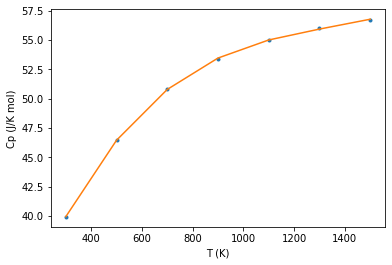

In [11]:
#Construção do gráfico para visualizar a qualidade do ajuste
plt.plot(T, cp , ".")
plt.plot(T, y(T), "-")
plt.ylabel('Cp (J/K mol)')
plt.xlabel('T (K)')
plt.show()

In [12]:
# Realizar a integração da função obtida no intervalo de temperaturas do problema.
# O resultado analítico da integração está escrito abaixo

T2 = 1500 #K
T1 = 298.15   #K


DeltaH = z[0]/4*(T2**4 - T1**4) + z[1]/3*(T2**3-T1**3) + z[2]/2*(T2**2-T1**2) + z[3]*(T2-T1)

print("DeltaH (J)=" + format(DeltaH,'6.2f'))

DeltaH (J)=62199.43


## Problemas) 2B.2) 

Os dados a seguir mostram como a capacidade calorífica molar padrão a pressão constante da amônia varia com a temperatura. Ajuste uma expressão com a forma $ C_{p,m} = a + bT + \frac{c}{T^2}$ aos dados, e determine os valores de a, b e c. Verifique se não seria melhor expressar os dados na forma $C_{p,m} = \alpha + \beta T + \gamma T^2$, e determine os valores desses coeficientes.

|   |   |   |   |    |   |    |    |    |
|---|---|---|---|---|---|---|---|---|
|T/K | 300 | 400 | 500 | 600 | 700 | 800 | 900 | 1000
|Cp,m (J K-¹mol-¹)    | 35,678 | 	38,674 | 41,994| 45,229|48,269 |51,112|	53,769| 56,244

In [14]:
T= np.array ([300,400,500,600,700,800,900,1000])
cp = np.array ([35.678,38.674,41.994,45.229,48.269,51.112,53.769,56.244])


# Definir a função que será ajustada usando o formato
# python para descrever funções

def func(T, a, b, c):

    return a + b*T + c/T**2

# ajuste da função usando mínimos quadrados
# popt são os parâmetros do modelo obtidos após ajuste
# pcov é a matriz de covariância de popt. A partir dela pode ser calculado o desvio padrão de cada parâmetro do ajuste
popt, pcov = curve_fit(func, T, cp)


print('Cºp,m = ' + format(popt[0] , ' 6.3e') + ' +' + format(popt[1] , ' 6.3e') + 'T ' + format(popt[2] , ' 6.5e') + '/T²')   

#imprimir só os coeficientes na forma de vetor
popt



Cºp,m =  2.880e+01 + 2.790e-02T -1.49041e+05/T²


array([ 2.87957598e+01,  2.78982105e-02, -1.49041155e+05])

In [15]:
# ajustando um polinômio de segunda grau

deg = 2

z = np.polyfit(T,cp,deg)
y = np.poly1d(z)


print(y)
print(z)

# Cp = a + b*T + c*T**2


            2
-6.495e-06 x + 0.03818 x + 24.64
[-6.49464286e-06  3.81848214e-02  2.46359464e+01]


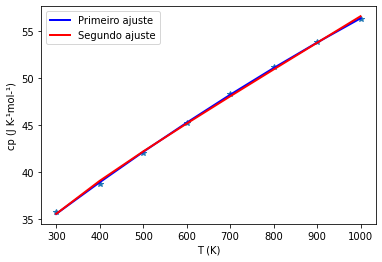

In [16]:
# Vamos construiri os gráficos para ver a diferença nos ajustes

plt.plot(T, cp , "*") #insere os pontos
plt.plot(T, y(T), "-", color='blue', linewidth=2, label='Primeiro ajuste') #faz a curva do primeiro ajuste
plt.plot(T,func(T,*popt), color='red', linewidth=2, label='Segundo ajuste') #faz a curva do segundo ajuste ajuste
plt.legend(loc='best') #mostra as legendas

#título dos eixos
plt.ylabel('cp (J K-¹mol-¹)')
plt.xlabel('T (K)')
plt.show()

Uma análise visual dos ajustes mostra que ambas as funções são equivalentes. Mas um teste estatístico pode indicar qual das funções se ajusta melhor aos dados experimentais.

## Problemas 2C.7

Às vezes é mais adequado exprimir a dependência que a capacidade calorífica tem em relação à temperatura pela expressão empírica $C_{p,m} = \alpha + \beta T + \gamma T^2$. Utilize esta expressão para determinar a entalpia padrão de combustão do metano a 350 K. Use os seguintes dados:

|   |   |   |   |
|---|---|---|---
|Coeficientes | $\alpha (J K^{-1} mol^{-1})$ | $ \beta (mJ K^{-2} mol^{-1})$ | $ \gamma (\mu J K^{-3} mol^{-1})$ |
|$CH_{4(g)}$   | 14,16| 75,5|–17,99| 
|$CO_{2 (g)}$  | 26,86| 6,97|-0,82|
|$O_{2 (g)}$   | 25,72| 12,98| -3,862|
|$H_2O_{(g)}$  | 30,36|9,61|1,184

### Solução

É possível estimar a variação de entalpia em uma determinada temperatura a partir da entalpia e capacidades caloríficas em uma temperatura de referência. Nestes casos, é aplicada a Lei de Kirchhoff:

$$ \int d\Delta H = \int_{T_1}^{T_2} \Delta C_{p} dT$$

$$ \Delta H(T_2) -  \Delta H(T_1) = \int_{T_1}^{T_2} \Delta C_{p} dT$$

Onde $\Delta C_{p}$ é a diferença das capacidades caloríficas entre produtos e reagentes. Neste caso, devemos calcular inicialmente a entalpia de combustão a 298K a partir de dados tabelados e depois aplicar a Lei de Kirchhoff.

In [17]:
# Definindo variáveis

T2= 350    #K
T1= 298    #K 


# Determinando o ΔH (298):    CH4  + 2O2  ----> CO2  + 2H2O

# ΔH(CH4)= -75
# ΔH(O2)= 0
# ΔH(CO2)= -394   
# ΔH(H2O)= -286 
  
# ΔH(298) = (ΔHf(CO2) + 2ΔHf(H2O)) - ΔHf(CH4)

DeltaH298 = (-394+(-2*286)) - (-75)

print("ΔH(298)=" + format(DeltaH298,'6.1f')+ "kJ/mol")


# Faremos agora a diferença entre os coeficientes 


# Para CH4:

a1 = 14.16   #J K-¹mol-¹
b1 = 75.5e-3     # mJ K-² mol-¹    (Como mili equivale a 10^-3, inserimos no coeficiente)
c1 = -17.99e-6   #μJ K-³ mol-¹      (Como micro equivale a 10^-6, inserimos no coeficiente)

#Para CO2:

a2 = 26.86        #J K-¹mol-¹
b2 = 6.97e-3      # mJ K-² mol-¹  
c2 = -0.82e-6     #μJ K-³ mol-¹


#Para O2:

a3 = 25.7   #J K-¹mol-¹
b3 = 12.98e-3    # mJ K-² mol-¹  
c3 = -3.862e-6    #μJ K-³ mol-¹

#Para H2O:

a4 = 30.36    #J K-¹mol-¹
b4 = 9.61e-3  #J K-¹mol-¹
c4 = 1.184e-6 #J K-¹mol-¹

# ΔCp = Cp produtos - Cp reagentes

# ΔCp = Cp (CO2) + 2Cp (H2O) - {Cp(CH4) + 2Cp (O2)} 


Da = 2*a4 + a2 - a1 - 2*a3

Db = 2*b4 + b2 - b1 - 2*b3

Dc = 2*c4 + c2 - c1 - 2*c3



#Integração de ΔCp em função da Temperatura.

# ΔH (350) = ΔHc(298) + [∫ΔCp dT] 

DH = DeltaH298*1000 + Da*(T2-T1) + Db/2*(T2**2-T1**2) + Da/3*(T2**3-T1**3)

print("Variação de Entalpia em 350 K = " + format(DH/1000,'6.2f') + "kJ/mol")


ΔH(298)=-891.0kJ/mol
Variação de Entalpia em 350 K = 119568.61kJ/mol
